<a href="https://colab.research.google.com/github/PingiliVaishnaviReddy/OIBSIP-CarPricePrediction-/blob/main/CarPrice_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [95]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [96]:
sns.set_style("whitegrid")

In [97]:
df = pd.read_csv("car data.csv")

# Data Preprocessing

In [98]:
print("Dataset Overview:")
print(df.info())

Dataset Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Driven_kms     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Selling_type   301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB
None


In [99]:
print("\nFirst 5 Rows of Dataset:")
print(df.head())


First 5 Rows of Dataset:
  Car_Name  Year  Selling_Price  Present_Price  Driven_kms Fuel_Type  \
0     ritz  2014           3.35           5.59       27000    Petrol   
1      sx4  2013           4.75           9.54       43000    Diesel   
2     ciaz  2017           7.25           9.85        6900    Petrol   
3  wagon r  2011           2.85           4.15        5200    Petrol   
4    swift  2014           4.60           6.87       42450    Diesel   

  Selling_type Transmission  Owner  
0       Dealer       Manual      0  
1       Dealer       Manual      0  
2       Dealer       Manual      0  
3       Dealer       Manual      0  
4       Dealer       Manual      0  


In [100]:
print("\nMissing Values in Dataset:")
print(df.isnull().sum())


Missing Values in Dataset:
Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Driven_kms       0
Fuel_Type        0
Selling_type     0
Transmission     0
Owner            0
dtype: int64


In [101]:
df['Car_Age'] = 2024 - df['Year']
df.drop(columns=['Year', 'Car_Name'], inplace=True)

In [102]:
df = pd.get_dummies(df, columns=['Fuel_Type', 'Selling_type', 'Transmission'], drop_first=True)

# Features and Target Variable

In [103]:
X = df.drop(columns=['Selling_Price'])
y = df['Selling_Price']

In [104]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [105]:
scaler_present_price = StandardScaler()
X_train['Present_Price'] = scaler_present_price.fit_transform(X_train[['Present_Price']])
X_test['Present_Price'] = scaler_present_price.transform(X_test[['Present_Price']])

print("Scaled Present Price (Train):")
print(X_train['Present_Price'].head())

print("\nScaled Present Price (Test):")
print(X_test['Present_Price'].head())

Scaled Present Price (Train):
184   -0.753751
132   -0.731457
194   -0.749626
75    -0.079367
111   -0.670149
Name: Present_Price, dtype: float64

Scaled Present Price (Test):
177   -0.773815
289    0.678618
228    0.210451
198   -0.773815
60     1.237075
Name: Present_Price, dtype: float64


In [106]:
scaler_driven_kms = StandardScaler()
X_train['Driven_kms'] = scaler_driven_kms.fit_transform(X_train[['Driven_kms']])
X_test['Driven_kms'] = scaler_driven_kms.transform(X_test[['Driven_kms']])

print("Scaled Driven Kms (Train):")
print(X_train['Driven_kms'].head())

print("\nScaled Driven Kms (Test):")
print(X_test['Driven_kms'].head())

Scaled Driven Kms (Train):
184   -0.275555
132   -0.814282
194    0.299088
75    -0.036120
111   -0.689776
Name: Driven_kms, dtype: float64

Scaled Driven Kms (Test):
177   -0.323442
289   -0.635185
228    0.538523
198   -0.060064
60     0.059678
Name: Driven_kms, dtype: float64


In [107]:
scaler_car_age = StandardScaler()
X_train['Car_Age'] = scaler_car_age.fit_transform(X_train[['Car_Age']])
X_test['Car_Age'] = scaler_car_age.transform(X_test[['Car_Age']])

print("Scaled Car Age (Train):")
print(X_train['Car_Age'].head())

print("\nScaled Car Age (Test):")
print(X_test['Car_Age'].head())

Scaled Car Age (Train):
184    1.969861
132   -1.156443
194    1.969861
75    -0.461709
111   -0.809076
Name: Car_Age, dtype: float64

Scaled Car Age (Test):
177   -0.809076
289   -0.809076
228    0.580393
198    0.927760
60     0.233025
Name: Car_Age, dtype: float64


In [108]:
scaler = StandardScaler()
X_train[['Present_Price', 'Driven_kms', 'Car_Age']] = scaler.fit_transform(X_train[['Present_Price', 'Driven_kms', 'Car_Age']])
X_test[['Present_Price', 'Driven_kms', 'Car_Age']] = scaler.transform(X_test[['Present_Price', 'Driven_kms', 'Car_Age']])

# Data Analysis

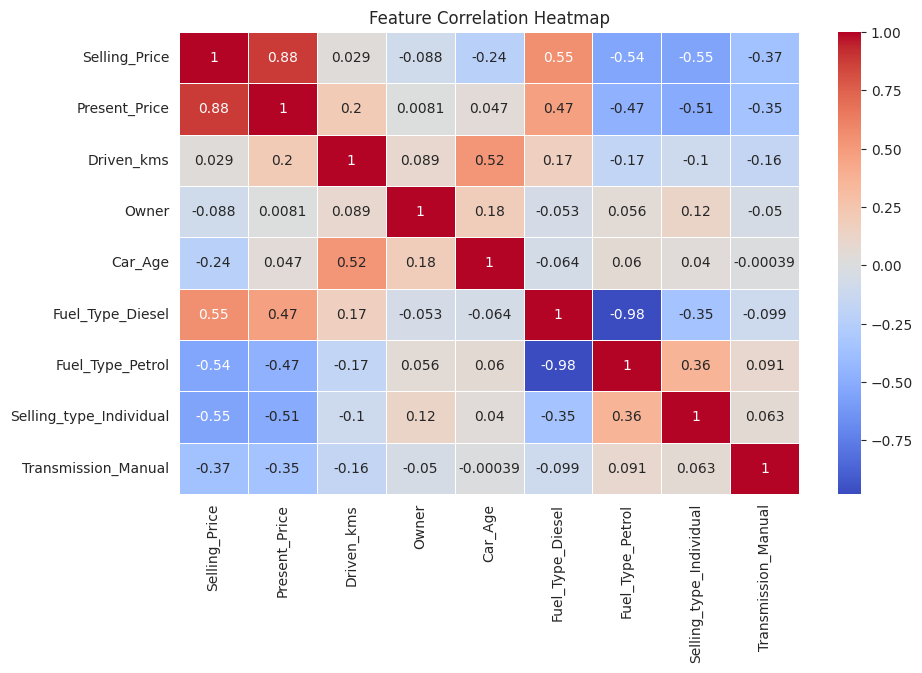

In [109]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()

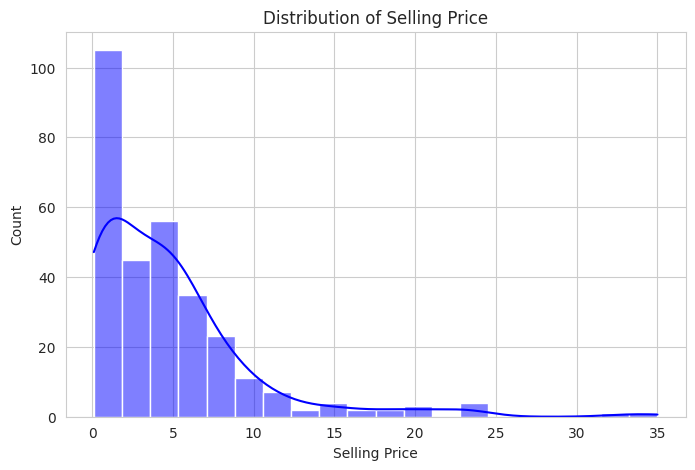

In [110]:
plt.figure(figsize=(8, 5))
sns.histplot(df['Selling_Price'], bins=20, kde=True, color='blue')
plt.title("Distribution of Selling Price")
plt.xlabel("Selling Price")
plt.ylabel("Count")
plt.show()

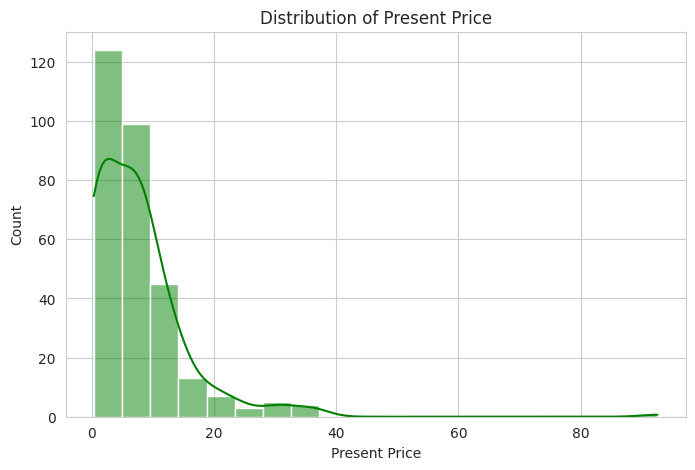

In [111]:
plt.figure(figsize=(8, 5))
sns.histplot(df['Present_Price'], bins=20, kde=True, color='green')
plt.title("Distribution of Present Price")
plt.xlabel("Present Price")
plt.ylabel("Count")
plt.show()

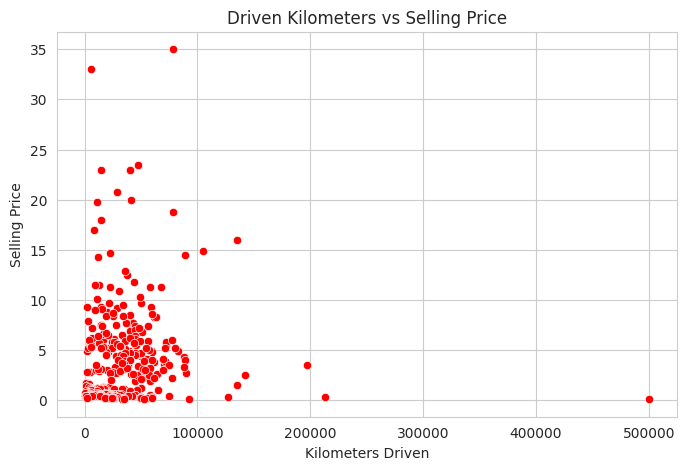

In [112]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x=df['Driven_kms'], y=df['Selling_Price'], color='red')
plt.title("Driven Kilometers vs Selling Price")
plt.xlabel("Kilometers Driven")
plt.ylabel("Selling Price")
plt.show()

<ipython-input-113-7e04ddc64b40>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df['Car_Age'], y=df['Selling_Price'], palette="coolwarm")


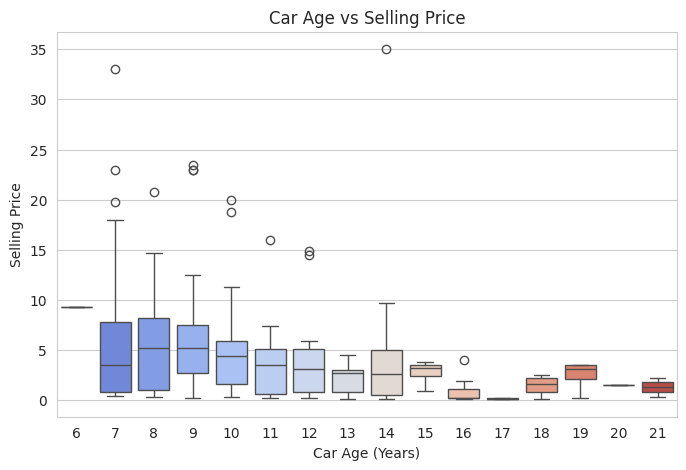

In [113]:
plt.figure(figsize=(8, 5))
sns.boxplot(x=df['Car_Age'], y=df['Selling_Price'], palette="coolwarm")
plt.title("Car Age vs Selling Price")
plt.xlabel("Car Age (Years)")
plt.ylabel("Selling Price")
plt.show()

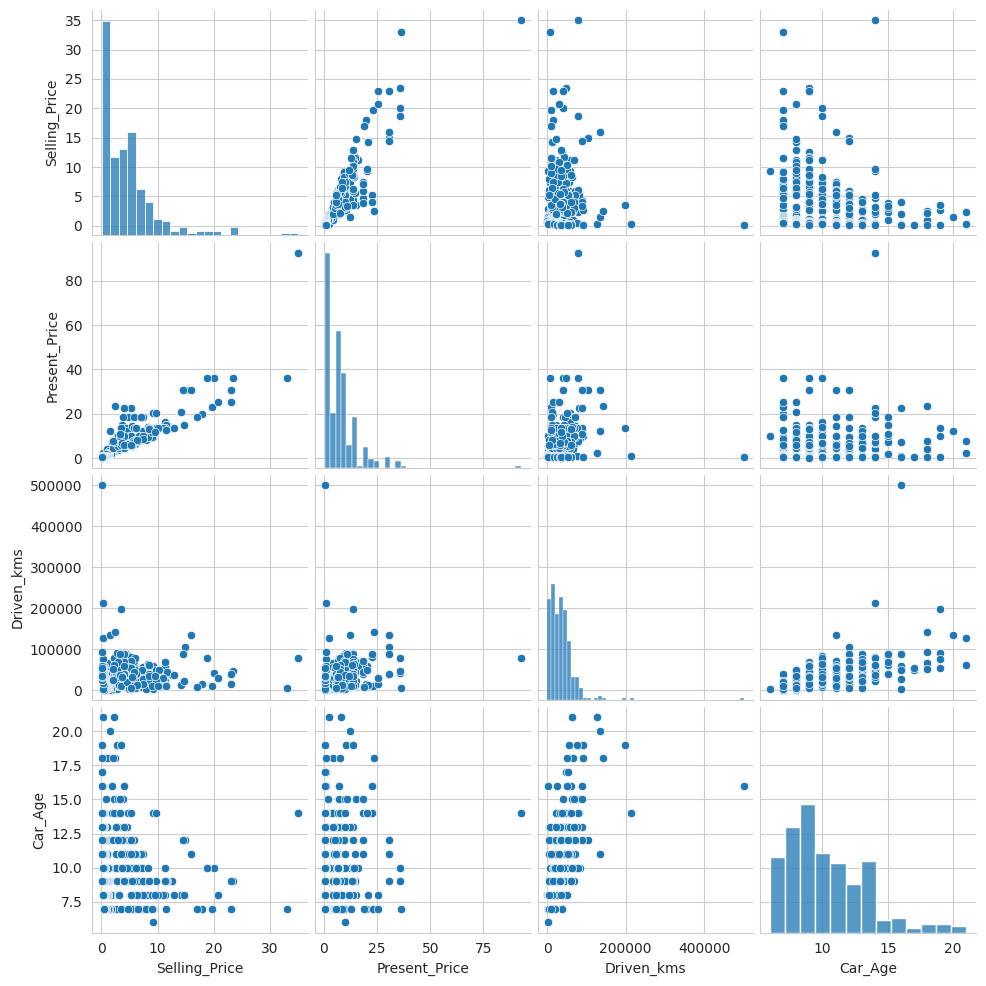

In [114]:
sns.pairplot(df[['Selling_Price', 'Present_Price', 'Driven_kms', 'Car_Age']])
plt.show()

# Evaluation

In [115]:
def evaluate_model(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)

    print(f"Model: {model.__class__.__name__}")
    print(f"Mean Absolute Error (MAE): {mae:.2f}")
    print(f"Mean Squared Error (MSE): {mse:.2f}")
    print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
    print(f"R² Score: {r2:.2f}\n")

In [116]:
models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(n_estimators=100, random_state=42)
}
for name, model in models.items():
    evaluate_model(model, X_train, X_test, y_train, y_test)

Model: LinearRegression
Mean Absolute Error (MAE): 1.22
Mean Squared Error (MSE): 3.48
Root Mean Squared Error (RMSE): 1.87
R² Score: 0.85

Model: RandomForestRegressor
Mean Absolute Error (MAE): 0.62
Mean Squared Error (MSE): 0.87
Root Mean Squared Error (RMSE): 0.93
R² Score: 0.96

Model: GradientBoostingRegressor
Mean Absolute Error (MAE): 0.59
Mean Squared Error (MSE): 0.88
Root Mean Squared Error (RMSE): 0.94
R² Score: 0.96



In [117]:
param_grid = {
    "n_estimators": [50, 100, 200],
    "max_depth": [None, 10, 20],
    "min_samples_split": [2, 5, 10]
}

In [118]:
rf = RandomForestRegressor(random_state=42)
grid_search = GridSearchCV(rf, param_grid, cv=5, scoring='r2', n_jobs=-1)
grid_search.fit(X_train, y_train)
best_rf = grid_search.best_estimator_
print(f"\nBest Random Forest Parameters: {grid_search.best_params_}")


Best Random Forest Parameters: {'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 100}


In [119]:
evaluate_model(best_rf, X_train, X_test, y_train, y_test)

Model: RandomForestRegressor
Mean Absolute Error (MAE): 0.61
Mean Squared Error (MSE): 0.84
Root Mean Squared Error (RMSE): 0.92
R² Score: 0.96



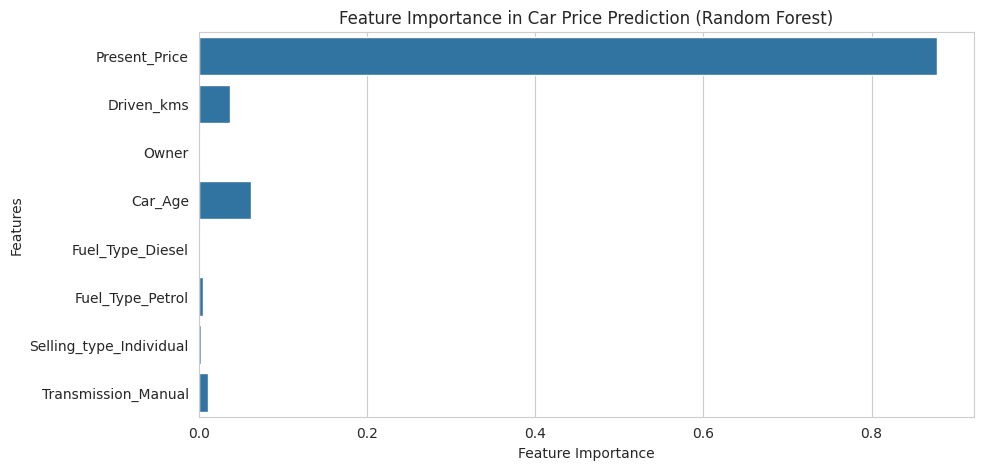

In [120]:
plt.figure(figsize=(10, 5))
sns.barplot(x=best_rf.feature_importances_, y=X.columns)
plt.xlabel("Feature Importance")
plt.ylabel("Features")
plt.title("Feature Importance in Car Price Prediction (Random Forest)")
plt.show()

# Saving the model

In [121]:
import pickle
with open('car_price_predictor_model.pkl', 'wb') as file:
    pickle.dump(best_rf, file)

In [122]:
with open('car_price_predictor_model.pkl', 'rb') as file:
    loaded_model = pickle.load(file)
predictions = loaded_model.predict(X_test)
print(predictions[:5])

[ 0.44319167 10.87489583  4.89384226  0.20914921  7.86378333]
